# Simple Neural Network using Tensorflow for solving XOR function

** Introduction : **
In this notebook we will go through the steps of making a simple 2-layer neural network that will learn the XOR function. The XOR 
function, exclusive or, will give us a 1 only if one of the inputs is zero and the other one, in cases of both beeing one or zero 
it returns zero, as can be seen in the following table. Where x1 and x2 are the inputs to the function and Y the output. We will use this data to train our model on as these cover all the usecases for the function.

| x1 | x2 | Y |
|:--:|:--:|:-:|
|  0 |  0 | 0 |
|  0 |  1 | 1 |
|  1 |  0 | 1 |
|  1 |  1 | 0 |

** Implementation : **
To start building the model we will use for this function we will first import the following packages:

- Tensorflow 
- Numpy

In [11]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Training data as presented in the table above

X_train = np.array([[0., 0.], [0., 1.], [1., 0.], [1., 1.]], dtype=np.float32)
Y_train = np.array([[0.], [1.], [1.], [0.]], dtype=np.float32)

We will use the Interactive Session from Tensorflow so that the Session is implicitly part of any call to  $eval()$, that way we dont have to pass the Session variable around making the code easier to read. 

In [12]:
sess = tf.InteractiveSession()

### Model ###

The neural network model we will be building will be a two layer neural network. Which we can see in the following figure : 

![Figure 1.) Neural network structure](nn_model.png)

As we can see from the figure above, the activation function for the hidden layer will be the [ReLU](https://medium.com/tinymind/a-practical-guide-to-relu-b83ca804f1f7) (rectified linear unit) function and for the output layer we will be using the [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) activation. 

To start building the neural network we will first have to define the variables for the weights $w1$, $w2$ and biases $b1$, $b2$. As we can see from the model structure above the model will have 2 input features $x1$ and $x2$, with :

- $n_{in}$ ... number of input features
- $n_{hidd}$ ... number of nodes in hidden layer

The weight matrices and bias vectors will have the following shapes : 

- $w_1.shape = (n_{in},n_{hidd})$
- $b_1.shape = (1,n_{hidd})$
- $w_2.shape = (n_{hidd},1)$
- $b_2.shape = (1,1)$

To implement this using tensorflow you can use this code :

In [13]:
n_in = 2
n_hidd = 2

w1 = tf.Variable(tf.random_uniform([n_in, n_hidd], -1, 1), trainable=True)
b1 = tf.Variable(tf.zeros(n_hidd))
w2 = tf.Variable(tf.random_uniform([n_hidd, 1], -1, 1), trainable=True)
b2 = tf.Variable(tf.zeros(1))

The next step is to define a so called *placeholder* using tensorflow for the input vector, $x$, and a *placeholder* for the true label vector, $y$, which will be used for computing the cost. The difference between variables and placeholders in tensorflow is that variables need to be initialized by the session before they're used, whereas placeholders are initialized by the session wherever they are run. We define them as follows :

In [14]:
x = tf.placeholder(shape=(None, n_in), dtype=tf.float32) 
y = tf.placeholder(shape=(None, 1), dtype=tf.float32)

Now we can use the previously defined blocks and start adding them together to build the model presented earlier.

To feed the input features to the hidden layer nodes and then to the output layer we will use the following equations : 

$$z_1 = w_1^Tx + b_1$$
$$a_1 = relu(z_1)$$
$$z_2 = w_2^Tx + b_2$$
$$a_2 = \sigma(z_2)$$

In the above equations we have implemented the activation functions as presented in Figure 1., the tensorflow code :

In [15]:
z1 = tf.matmul(x, w1) + b1
a1 = tf.nn.relu(z1)
z2 = tf.matmul(a1, w2) + b2
a2 = tf.sigmoid(z2)

We have now completed the forward propagation implementation part of the neural network model. Implementing the cost function and gradient descent, where the learning happens, is the next step. Doing so is pretty easy with tensorflow but reading up on [gradient descent](https://hackernoon.com/gradient-descent-aynk-7cbe95a778da) and coding it yourself would be a very good exercise and is highly recommended. Regarding the gradient descent we need to choose a good learning rate, we will use $0.1$ but you should also try smaller and bigger values to see how the model evolves.

As our loss we will implement the following function : 

$$J = -(y \cdot log(a2) + (1 - y) \cdot log(1 - a2))$$

And use the gradient descent algorithm to minimize the cost computed over our training examples. To rule out any missconceptions, "loss" is used when reffering to a single training example and the "cost" is over the entire training set. The tensorflow code for the loss and gradient descent is :

In [36]:
learning_rate = 0.1
cost = tf.reduce_mean(-(y*tf.log(a2) + (1-y)*tf.log(1-a2))) 
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In this step we will have to define a variable initializer which will initialize all the variables defined earlier so that they can be used properly by the code we wrote previously. An important note here is that depending on the initialized values for the weights you will be able to observe the cost converging to a relatively high value and staying around that point or you will see the cost converging rapidly to a value close to zero. So if you get a slow convergence first time running, try it again until you hit initial values that allow a much faster convergence.

Now we will just need to repeat the gradient descent for a number of iterations, in our case we will run the training for $20000$ iterations and print the cost every $1000$ iterations.

In [37]:
# simple function for calculating the accuracy

def calc_acc(y1, y2):
    miss = 0
    for v1,v2 in zip(y1,y2):
        if v1 != v2:
            miss += 1
    return ((len(y1)-miss)/len(y1))*100

Iter = 0, Cost = 0.644, Acc = 50.00%
Iter = 1000, Cost = 0.030, Acc = 100.00%
Iter = 2000, Cost = 0.011, Acc = 100.00%
Iter = 3000, Cost = 0.006, Acc = 100.00%
Iter = 4000, Cost = 0.004, Acc = 100.00%
Iter = 5000, Cost = 0.003, Acc = 100.00%
Iter = 6000, Cost = 0.003, Acc = 100.00%
Iter = 7000, Cost = 0.002, Acc = 100.00%
Iter = 8000, Cost = 0.002, Acc = 100.00%
Iter = 9000, Cost = 0.002, Acc = 100.00%
Iter = 10000, Cost = 0.002, Acc = 100.00%
Iter = 11000, Cost = 0.001, Acc = 100.00%
Iter = 12000, Cost = 0.001, Acc = 100.00%
Iter = 13000, Cost = 0.001, Acc = 100.00%
Iter = 14000, Cost = 0.001, Acc = 100.00%
Iter = 15000, Cost = 0.001, Acc = 100.00%
Iter = 16000, Cost = 0.001, Acc = 100.00%
Iter = 17000, Cost = 0.001, Acc = 100.00%
Iter = 18000, Cost = 0.001, Acc = 100.00%
Iter = 19000, Cost = 0.001, Acc = 100.00%


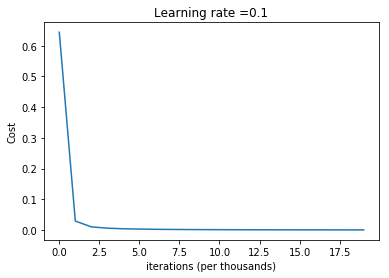

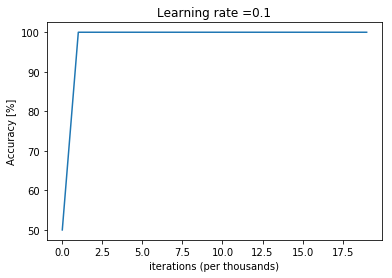

In [38]:
init = tf.global_variables_initializer()
init.run()

cost_list = []
acc_list = []
for i in range(20000):
    train_step.run(feed_dict={x: X_train, y: Y_train})
    if i%1000 == 0:
        curr_cost = cost.eval(feed_dict={x: X_train, y: Y_train})
        y_pred = a2.eval(feed_dict={x: X_train})
        y_pred = (y_pred > 0.5).astype(np.float32)
        curr_acc = calc_acc(Y_train, y_pred)
        print('Iter = {}, Cost = {:.3f}, Acc = {:.2f}%'.format(i, curr_cost, curr_acc))
        cost_list.append(curr_cost)
        acc_list.append(curr_acc)
        
plt.plot(cost_list)
plt.ylabel('Cost')
plt.xlabel('iterations (per thousands)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

plt.plot(acc_list)
plt.ylabel('Accuracy [%]')
plt.xlabel('iterations (per thousands)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

We have now a model that we have trained and made ready for use, so let's test it on some test data. 


In [29]:
X_test = np.array([[1., 1.], [0., 0.], [1., 0.], [1., 1.], [1., 0], [0., 1.], [0., 0.], [0., 1.], [0., 1.], [1., 1.], [1., 0.]], dtype=np.float32)
Y_test = np.array([[0.], [0.], [1.], [0.], [1.], [1.] , [0.], [1.], [1.], [0.], [1.]], dtype=np.float32)

y_pred = a2.eval(feed_dict={x: X_test})
y_pred = (y_pred > 0.5).astype(np.float32)

acc = calc_acc(Y_test, y_pred)
print('y_pred')
print(y_pred.T)
print('Y_test')
print(Y_test.T)
print('Accuracy = {:.2f} %'.format(acc))

y_pred
[[0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1.]]
Y_test
[[0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1.]]
Accuracy = 100.00 %


We achieve a accuracy of 100% which was expected given the number of iterations over our training data. In this case we wanted to achieve overfitting on the training data because it is the only data our model will probably encounter. Let's try now what happens if we plug in some different values than ones and zeros. Lets run the following code : 

In [30]:
# test data :

X_test = np.array([[2., 1.], [1., 1.], [-1., 1.], [-2., -2.]], dtype=np.float32)
y_pred = a2.eval(feed_dict={x: X_test})
y_pred = (y_pred > 0.5).astype(np.float32)

acc = calc_acc(Y_test, y_pred)

print('X_test')
print(X_test.T)
print('y_pred')
print(y_pred.T)


X_test
[[ 2.  1. -1. -2.]
 [ 1.  1.  1. -2.]]
y_pred
[[1. 0. 1. 0.]]


We see that the model has learned to look for the difference of the two input features, if the difference is not equal to zero it outputs a 0 and otherwise a 1. 